In [102]:
import json
import pandas as pd
from math import sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


def load_file(*files: str):
    data = {}
    for filename in files:
        with open(filename) as f:
            for line in f.readlines():
                if line.startswith('//'):
                    continue

                d = json.loads(line)

                # drop all the metadata and the raw sample values
                record = {
                    **d['relays'],
                    **d['data'],
                }

                # flip the sign of the caps value if the z value is 1
                if record['z'] == 1:
                    record['caps'] *= -1

                record.pop('z')

                record['sum'] = record['t_v_mag'] + record['t_c_mag']
                record['rms'] = ((sqrt(record['t_v_mag']) + sqrt(record['t_c_mag'])) / 2) ** 2
                record['diff'] = abs(record['t_v_mag'] - record['t_c_mag'])

                record['t_signed_phase'] = record['t_phase']
                if record['t_sign'] == 1:
                    record['t_signed_phase'] *= -1

                # record.pop('t_sign')

                relays = d['relays']
                key = f"{relays['caps']}:{relays['inds']}:{relays['z']}"
                data[key] = record

    df = pd.DataFrame.from_records(list(data.values()))

    return df

In [103]:
def plot(df):
    df.sort_values(by='m_swr')
    best = df.sort_values(by='m_swr').head(1)

    cap = best['caps'].values[0]
    ind = best['inds'].values[0]

    point = (cap, ind)

    fig, ax = plt.subplots(3, 3, figsize=(25, 10))

    sns.scatterplot(df, x='caps', y='inds', size=1, hue='m_swr', hue_norm=(1.0, 3.0), palette='plasma_r', ax=ax[0, 0])
    sns.scatterplot(df, x='caps', y='inds', size=1, hue='m_fwd', palette='plasma', ax=ax[0, 1])
    sns.scatterplot(df, x='caps', y='inds', size=1, hue='m_rev', palette='plasma_r', ax=ax[0, 2])
    sns.scatterplot(df, x='caps', y='inds', size=1, hue='t_phase', palette='plasma_r', ax=ax[1, 0])
    sns.scatterplot(df, x='caps', y='inds', size=1, hue='t_sign', palette='coolwarm', ax=ax[1, 1])
    sns.scatterplot(df, x='caps', y='inds', size=1, hue='sum', palette='plasma', ax=ax[1, 2])
    sns.scatterplot(df, x='caps', y='inds', size=1, hue='t_v_mag', palette='plasma', ax=ax[2, 0])
    sns.scatterplot(df, x='caps', y='inds', size=1, hue='t_c_mag', palette='plasma', ax=ax[2, 1])
    sns.scatterplot(df, x='caps', y='inds', size=1, hue='diff', palette='plasma_r', ax=ax[2, 2])

    ax[0, 0].add_patch(mpatches.Circle(xy=point, radius=1, color='red', fill=False))
    ax[0, 1].add_patch(mpatches.Circle(xy=point, radius=1, color='red', fill=False))
    ax[0, 2].add_patch(mpatches.Circle(xy=point, radius=1, color='red', fill=False))
    ax[1, 0].add_patch(mpatches.Circle(xy=point, radius=1, color='red', fill=False))
    ax[1, 1].add_patch(mpatches.Circle(xy=point, radius=1, color='red', fill=False))
    ax[1, 2].add_patch(mpatches.Circle(xy=point, radius=1, color='red', fill=False))
    ax[2, 0].add_patch(mpatches.Circle(xy=point, radius=1, color='red', fill=False))
    ax[2, 1].add_patch(mpatches.Circle(xy=point, radius=1, color='red', fill=False))
    ax[2, 2].add_patch(mpatches.Circle(xy=point, radius=1, color='red', fill=False))

    # ax[0, 0].add_patch()
    # ax[0, 1].add_patch()
    # ax[0, 2].add_patch()
    # ax[1, 0].add_patch()
    # ax[1, 1].add_patch()
    # ax[1, 2].add_patch()
    # ax[2, 0].add_patch()
    # ax[2, 1].add_patch()
    # ax[2, 2].add_patch()

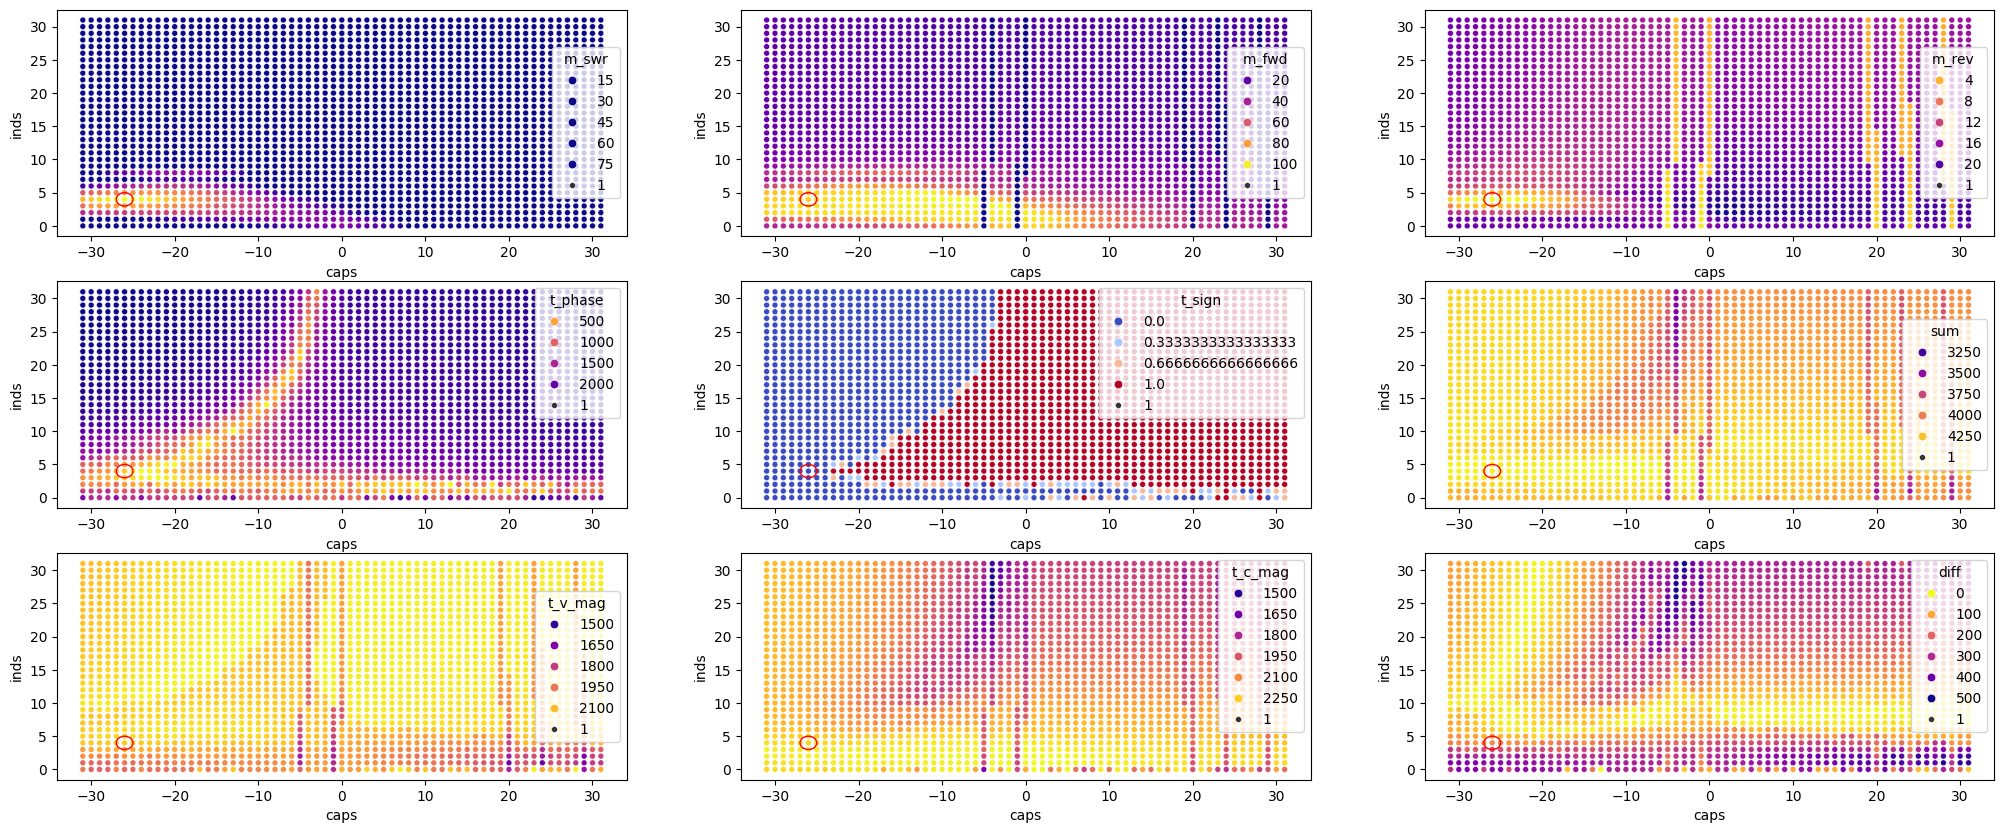

In [104]:
df = load_file('ant2_14mhz.jsonl')

plot(df)

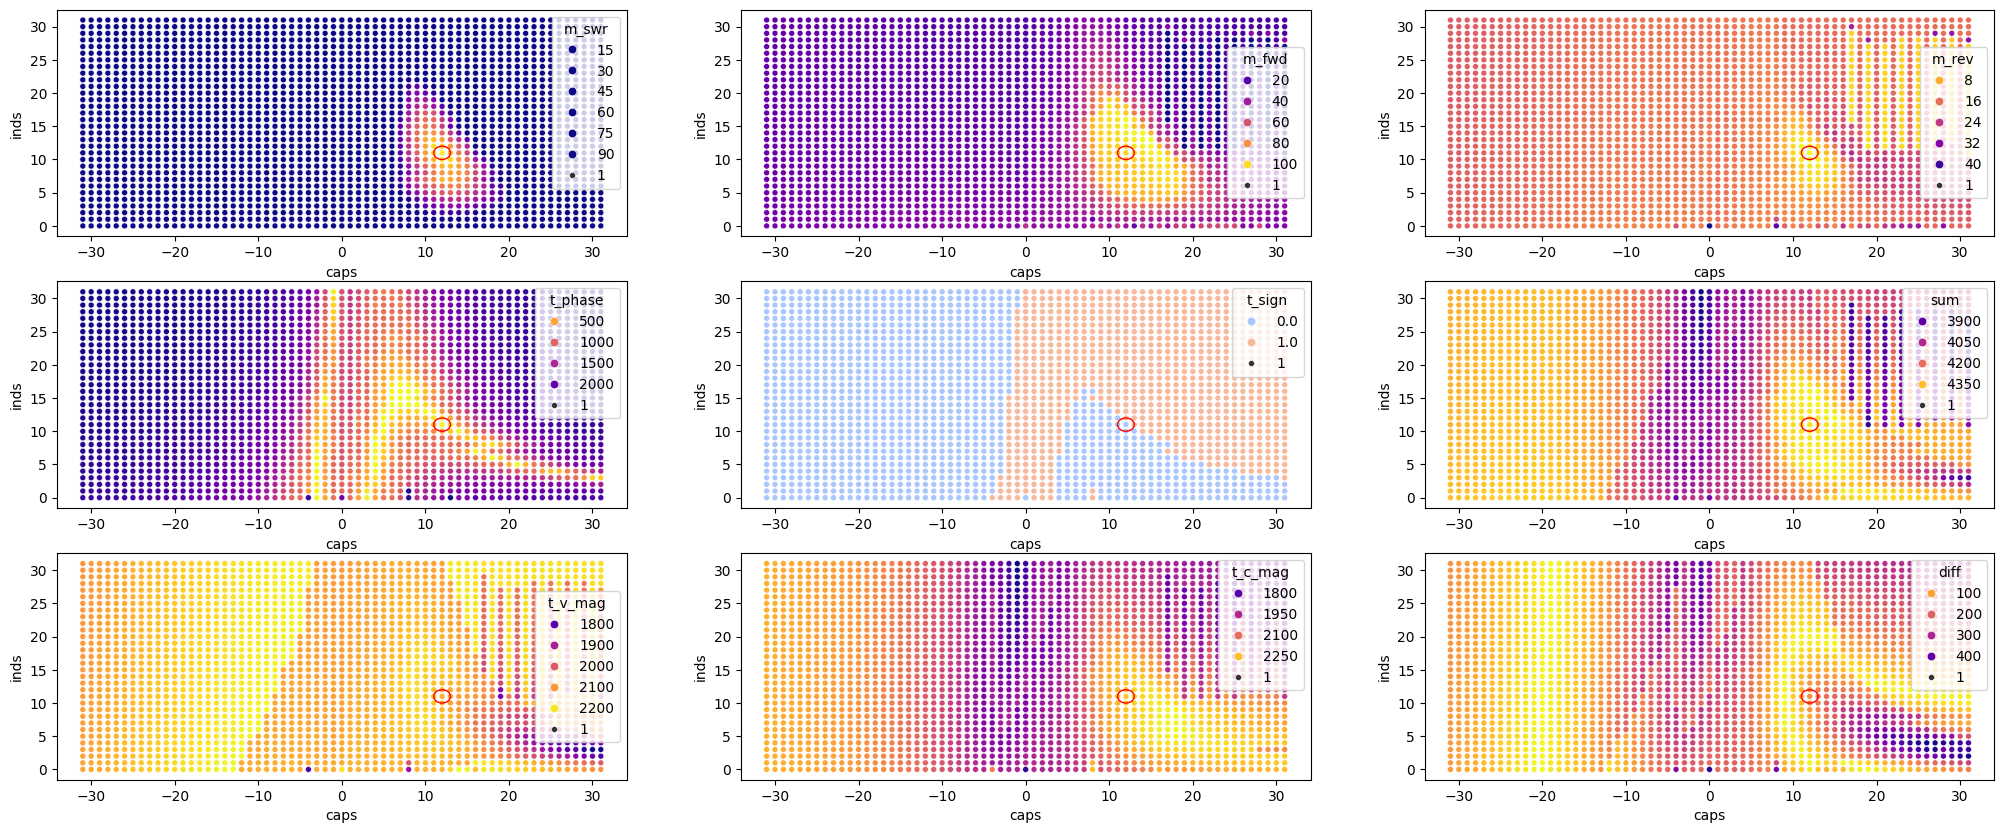

In [105]:
df = load_file('ant3_14mhz.jsonl')

plot(df)

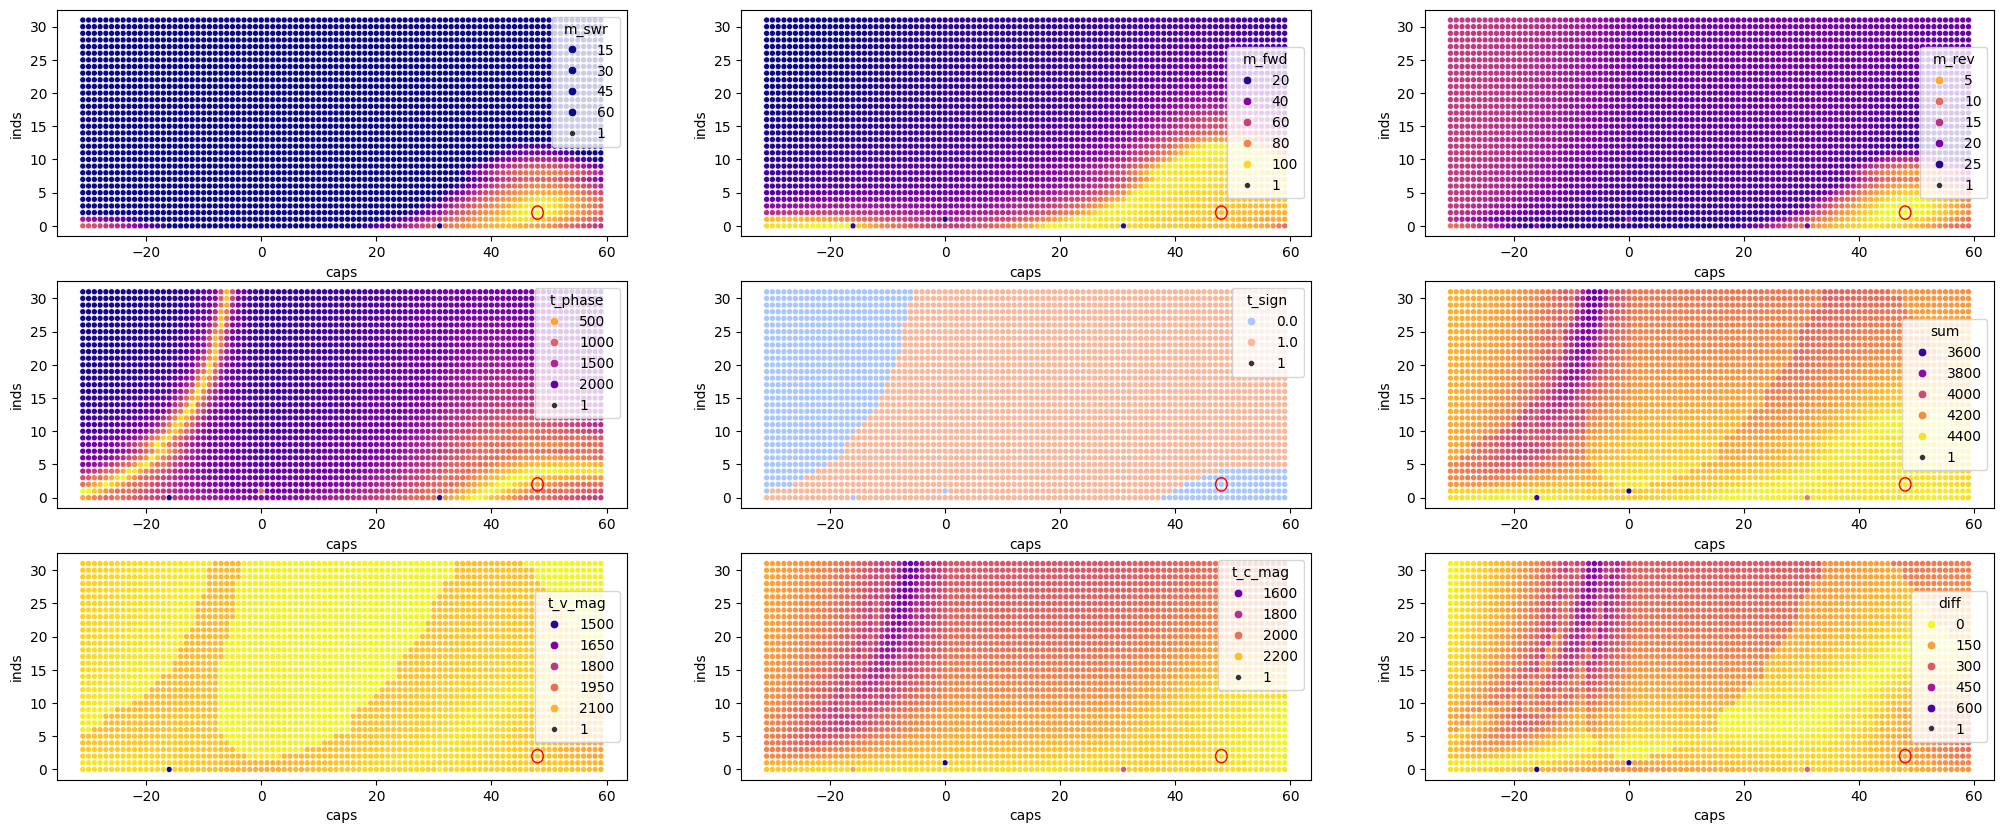

In [106]:
df = load_file('ant3_10mhz.jsonl')

plot(df)

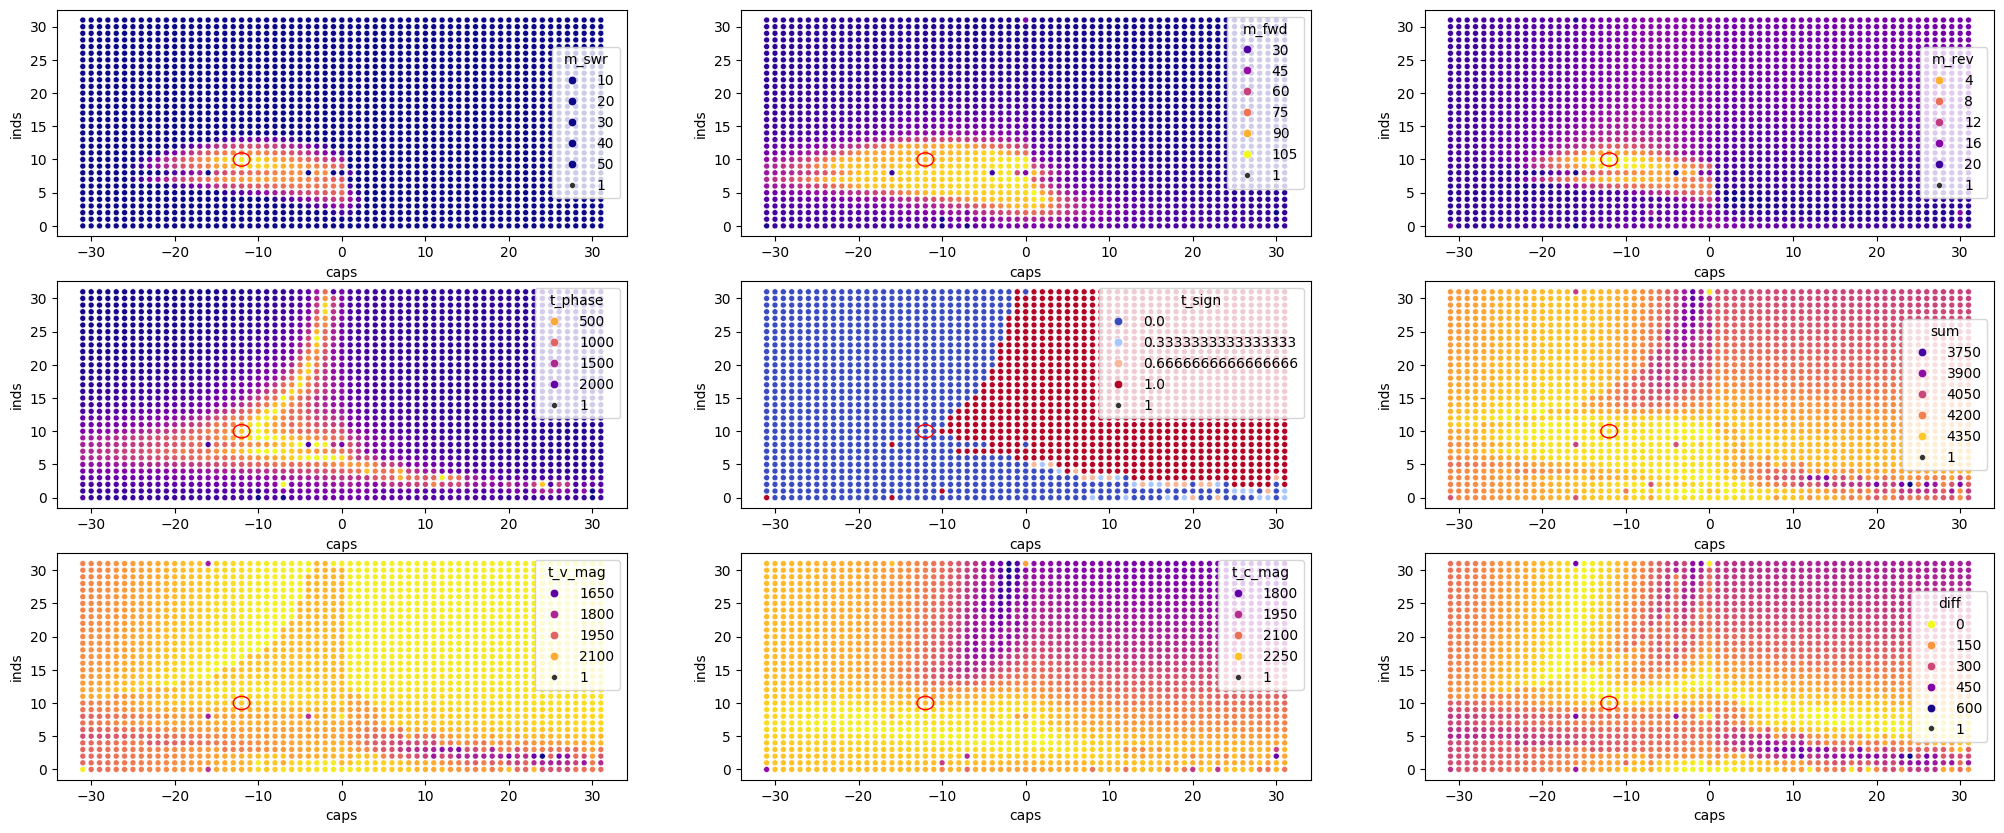

In [107]:
df = load_file('ant3_18mhz.jsonl')

plot(df)